

# **Inicialização**

In [1]:
#para conectar ao Drive
from google.colab import drive # Carrega biblioteca para montar e carregar drive
drive.mount('/content/drive') # Esse código pedirá autenticação


Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/TCC")

In [3]:
!ls
#https://colab.research.google.com/drive/1MPBU7kXUIbZcyR8jMJgobImvmQ5TGWAA

 BreastCancer.csv
 Caruaru-SOFTMAX.csv
 Corridas_Cidades_Eleitas-FINAL-Acentuado-Probabilidades-ComSemanaTeste.csv
 Corridas_Cidades_Eleitas-FINAL-Acentuado-Probabilidades.csv
 Corridas_Cidades_Eleitas-fINAL.csv
 Corridas_Cidades_Fortaleza-fINAL-Acentuado.csv
 Corridas_Fortaleza-FINAL-Acentuado-Probabilidades-ComSemanaTeste.csv
 Corridas_TESTE_SOFTMAX.csv
 Corumba-SOFTMAX.csv
 kddCupNovo.txt
 kddCup.txt
 PatosDeMinas-SOFTMAX.csv
 Petrolina-SOFTMAX.csv
 Petrolina-SOFTMAX-Regioes.csv
'Petrolina-SOFTMAX - Relevantes.csv'
 predictions_training_test.pdf
 predictions_training_test.svg
 Resultados_Semana_Teste.csv
 Resultados_Semana_Teste.gsheet
 Santarem-SOFTMAX.csv


### **Importacao de bibliotecas**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#**Carga da Base e Seleção da Cidade de Partida** 

In [5]:
#Retirar do Comentário a Cidade de Partida
#cidade_partida = 'Patos de Minas'
cidade_partida = 'Fortaleza'
#cidade_partida = 'Santarem'
#cidade_partida = 'Petrolina'

if (cidade_partida == 'Fortaleza'):
  df1 = pd.read_csv('Corridas_Fortaleza-FINAL-Acentuado-Probabilidades-ComSemanaTeste.csv', decimal=',', delimiter=';') 
else:
  df1 = pd.read_csv('Corridas_Cidades_Eleitas-FINAL-Acentuado-Probabilidades-ComSemanaTeste.csv', decimal=',', delimiter=';') 


df1=df1[df1['nome_cidade_partida'] == cidade_partida]


### TESTANDO SÓ PERÌODO DO HORÀRIO COMERCIAL
# Se for rodar simulação somente para um período do dia, descomentar a linha abaixo
df1 = df1[(df1['hora_da_criacao'] >= 8) & (df1['hora_da_criacao'] <= 19)]

# colocar id como nome de linha
df1 = df1.set_index('id')
df1.head(1000)

,nome_cidade_partida,dia_da_criacao,dia_semana_da_criacao,hora_da_criacao,bairro_partida,PROBABILIDADE
id,,,,,,
241,Fortaleza,1,4,8,Aldeota,0.047619
242,Fortaleza,1,4,8,Antonio Bezerra,0.015873
243,Fortaleza,1,4,8,Bairro de Fatima,0.015873
244,Fortaleza,1,4,8,Benfica,0.015873
245,Fortaleza,1,4,8,Bom Jardim,0.015873
...,...,...,...,...,...,...
1519,Fortaleza,2,5,15,Moura Brasil,0.004695
1520,Fortaleza,2,5,15,Padre Andrade,0.004695
1521,Fortaleza,2,5,15,Papicu,0.018779


In [6]:
#dimensões da base
df1.shape

(42510, 6)

In [7]:
### MULTIPLICA POR 100 A PROBABILIDADE PARA DIMINUIR PROBLEMAS DE CÁLCULOS COM VALORES PEQUENOS
df1['PROBABILIDADE'] = df1['PROBABILIDADE']*100
df1['PROBABILIDADE'].head()

id
241    4.761905
242    1.587302
243    1.587302
244    1.587302
245    1.587302
Name: PROBABILIDADE, dtype: float64

# **Converte Variáveis para DUMMY**

### **Converte Variáveis Numéricas para String**

In [8]:
# Essa conversão é necessária para permitir que no passo seguinte sejam convertidas para DUMMY
# Foram convertidas para DUMMY pois são categóricas
df1['dia_semana_da_criacao']=df1['dia_semana_da_criacao'].astype(str)
df1['dia_da_criacao']=df1['dia_da_criacao'].astype(str)
df1['hora_da_criacao']=df1['hora_da_criacao'].astype(str)

### **Conversão para DUMMY**

In [9]:
df1 = pd.get_dummies(df1)  
df1.head()


,PROBABILIDADE,nome_cidade_partida_Fortaleza,dia_da_criacao_1,dia_da_criacao_10,dia_da_criacao_11,dia_da_criacao_12,dia_da_criacao_13,dia_da_criacao_14,dia_da_criacao_15,dia_da_criacao_16,dia_da_criacao_17,dia_da_criacao_18,dia_da_criacao_19,dia_da_criacao_2,dia_da_criacao_20,dia_da_criacao_21,dia_da_criacao_22,dia_da_criacao_23,dia_da_criacao_24,dia_da_criacao_25,dia_da_criacao_26,dia_da_criacao_27,dia_da_criacao_28,dia_da_criacao_29,dia_da_criacao_3,dia_da_criacao_30,dia_da_criacao_31,dia_da_criacao_4,dia_da_criacao_5,dia_da_criacao_6,dia_da_criacao_7,dia_da_criacao_8,dia_da_criacao_9,dia_semana_da_criacao_1,dia_semana_da_criacao_2,dia_semana_da_criacao_3,dia_semana_da_criacao_4,dia_semana_da_criacao_5,dia_semana_da_criacao_6,dia_semana_da_criacao_7,...,bairro_partida_Praia do Futuro II,bairro_partida_Praia do Meireles,bairro_partida_Presidente Kennedy,bairro_partida_Presidente Tancredo Neves,bairro_partida_Quintino Cunha,bairro_partida_Rodolfo Teofilo,bairro_partida_SERRINHA,bairro_partida_SIQUEIRA,bairro_partida_Sabiaguaba,bairro_partida_Salinas,bairro_partida_Santa Fe,bairro_partida_Santos Dumont,bairro_partida_Sao Benedito,bairro_partida_Sao Bento,bairro_partida_Sao Gerardo,bairro_partida_Sao Joao do Tauape,bairro_partida_Seis Blocos,bairro_partida_Seis Bocas,bairro_partida_Senador Carlos Jereissati,bairro_partida_Serrinha,bairro_partida_Sertao do Maruim,bairro_partida_Siqueira,bairro_partida_Sitios Novos,bairro_partida_Tabapua,bairro_partida_Tabapuazinho,bairro_partida_Tabuba,bairro_partida_Tamatanduba,bairro_partida_Tauape,bairro_partida_Timbo,bairro_partida_Torre II,bairro_partida_Torre Sul,bairro_partida_Varjota,bairro_partida_Vicente Pinzon,bairro_partida_Vila Ellery,bairro_partida_Vila Machado,bairro_partida_Vila Peri,bairro_partida_Vila Uniao,bairro_partida_Vila Velha,bairro_partida_Wayne Township,bairro_partida_Ypacarai
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
241,4.761905,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
242,1.587302,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
243,1.587302,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
244,1.587302,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245,1.587302,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Separa em Base de Treino e Base de Teste**

### **Separa a Semana de Teste**

In [10]:
# Criei uma semana de teste na base de entrada com todas as combinações 
# possíveis de bairros, dia da semana e horário para extrair as estimativas
# do modelo para essa semana
# A semana corresponde ao mesmo período da Base de Teste, ou seja,
# 12 a 18 de Janeiro

#SEPARA A SEMANA DE TESTE
if cidade_partida == 'Petrolina':
  df_semana_teste = df1.loc[200000:299999] #PETROLINA
  df1.loc[200000:299999]
  df1 = df1.loc[:199999]
elif cidade_partida == 'Patos de Minas':
  df_semana_teste = df1.loc[100000:199999] #Patos de MINAS
  df1.loc[100000:199999]
  df1 = df1.loc[:99999]
elif cidade_partida == 'Fortaleza':
  df_semana_teste = df1.loc[300000:399999] #Fortaleza
  df1.loc[300000:399999]
  df1 = df1.loc[:299999]


In [11]:
# EXCLUI A COLUNA PROBABILIDADE (TODA ZERADA) DA SEMANA DE TESTE
# Não precisamos dessa informação pois essa será a variável a ser prevista
# pelo modelo
df_semana_teste.head()
df_semana_teste=df_semana_teste.drop(columns=['PROBABILIDADE'])
df_semana_teste.head()

,nome_cidade_partida_Fortaleza,dia_da_criacao_1,dia_da_criacao_10,dia_da_criacao_11,dia_da_criacao_12,dia_da_criacao_13,dia_da_criacao_14,dia_da_criacao_15,dia_da_criacao_16,dia_da_criacao_17,dia_da_criacao_18,dia_da_criacao_19,dia_da_criacao_2,dia_da_criacao_20,dia_da_criacao_21,dia_da_criacao_22,dia_da_criacao_23,dia_da_criacao_24,dia_da_criacao_25,dia_da_criacao_26,dia_da_criacao_27,dia_da_criacao_28,dia_da_criacao_29,dia_da_criacao_3,dia_da_criacao_30,dia_da_criacao_31,dia_da_criacao_4,dia_da_criacao_5,dia_da_criacao_6,dia_da_criacao_7,dia_da_criacao_8,dia_da_criacao_9,dia_semana_da_criacao_1,dia_semana_da_criacao_2,dia_semana_da_criacao_3,dia_semana_da_criacao_4,dia_semana_da_criacao_5,dia_semana_da_criacao_6,dia_semana_da_criacao_7,hora_da_criacao_10,...,bairro_partida_Praia do Futuro II,bairro_partida_Praia do Meireles,bairro_partida_Presidente Kennedy,bairro_partida_Presidente Tancredo Neves,bairro_partida_Quintino Cunha,bairro_partida_Rodolfo Teofilo,bairro_partida_SERRINHA,bairro_partida_SIQUEIRA,bairro_partida_Sabiaguaba,bairro_partida_Salinas,bairro_partida_Santa Fe,bairro_partida_Santos Dumont,bairro_partida_Sao Benedito,bairro_partida_Sao Bento,bairro_partida_Sao Gerardo,bairro_partida_Sao Joao do Tauape,bairro_partida_Seis Blocos,bairro_partida_Seis Bocas,bairro_partida_Senador Carlos Jereissati,bairro_partida_Serrinha,bairro_partida_Sertao do Maruim,bairro_partida_Siqueira,bairro_partida_Sitios Novos,bairro_partida_Tabapua,bairro_partida_Tabapuazinho,bairro_partida_Tabuba,bairro_partida_Tamatanduba,bairro_partida_Tauape,bairro_partida_Timbo,bairro_partida_Torre II,bairro_partida_Torre Sul,bairro_partida_Varjota,bairro_partida_Vicente Pinzon,bairro_partida_Vila Ellery,bairro_partida_Vila Machado,bairro_partida_Vila Peri,bairro_partida_Vila Uniao,bairro_partida_Vila Velha,bairro_partida_Wayne Township,bairro_partida_Ypacarai
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300008,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
300009,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
300010,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
300011,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
300012,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Criação de Base de Teste "Aleatória"**

#### **Indicar a semente inicial e para divisão da base em treino e teste**

In [12]:
## NÂO usei essa solução no treino do MODELO
## Usei a opção seguinte de base de teste direcionada para o período de 
## 12 a 18 de Janeiro
import random
np.random.seed(0) #semente inicial
nlinhas = df1.shape[0]
nlinhas

21426

In [13]:
from sklearn.model_selection import train_test_split
#Divide a base em treino e teste. A coluna 'PROBABILIDADE' é o Label. Test_size diz o tamanho da amostra de Teste (no caso 30%) 
#x_train, x_test, y_train, y_test = train_test_split(df1.drop(columns=['PROBABILIDADE']), 
#                                                    df1['PROBABILIDADE'], test_size=0.3)
#x_train.head()






### **Criação de Base de Teste "Direcionada" (Semana de 12 a 18 / Janeiro)**

In [14]:
## VERSÂO DIRECIONADA PARA TREINAR COM MÊS TODO EXCETO SEMANA DE TESTE

x_test = df1[(df1['dia_da_criacao_12'] == 1)|(df1['dia_da_criacao_13'] == 1)|(df1['dia_da_criacao_14'] == 1)|(df1['dia_da_criacao_15'] == 1)|(df1['dia_da_criacao_16'] == 1)|(df1['dia_da_criacao_17'] == 1)|(df1['dia_da_criacao_18'] == 1)]
y_test = x_test['PROBABILIDADE']
x_test = x_test.drop(columns=['PROBABILIDADE'])

x_train = df1[(df1['dia_da_criacao_12'] == 0)&(df1['dia_da_criacao_13'] == 0)&(df1['dia_da_criacao_14'] == 0)&(df1['dia_da_criacao_15'] == 0)&(df1['dia_da_criacao_16'] == 0)&(df1['dia_da_criacao_17'] == 0)&(df1['dia_da_criacao_18'] == 0)]
y_train = x_train['PROBABILIDADE']
x_train = x_train.drop(columns=['PROBABILIDADE'])
x_train
y_train


id
241      4.761905
242      1.587302
243      1.587302
244      1.587302
245      1.587302
           ...   
31427    0.442478
31428    0.442478
31429    0.442478
31430    0.884956
31431    0.442478
Name: PROBABILIDADE, Length: 16470, dtype: float64

# **Rede Neural**

### **Converte Dataframe de Pandas para Numpy para inserir na RN**

In [15]:
## Conversão necessária para inserir dados nas funções da RN
X_train_normalized = x_train.to_numpy()
X_test_normalized = x_test.to_numpy()
df_semana_teste_normalized = df_semana_teste.to_numpy()


### **Importa bibliotecas necessárias para uso na RN**

In [16]:
import tensorflow as tf
from keras import Model, Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adam, Adamax, Adagrad, Adadelta, Nadam

In [17]:
X_train_normalized.shape[1:]

(302,)

### **Cria a Rede Neural**

In [18]:
#Inicia a rede
RN = Sequential()
# Cria primeira camada  e 'input_shape' entradas
RN.add(Dense(314,input_shape = X_train_normalized.shape[1:], activation = 'relu')) # antes sigmoid
#RN.add(Dropout(0.2))


RN.add(Dense(157,activation = 'relu'))
#RN.add(Dense(40,activation = 'relu'))
#RN.add(Dense(22,activation = 'relu'))
#RN.add(Dense(50,activation = 'sigmoid'))
#RN.add(dropout(0.2))
#RN.add(Dense(4,activation = 'sigmoid'))
RN.add(Dense(1,activation = 'relu'))
# linha do programa original --> Cria segunda e última camada 2 células (número de classes)
# RN.add(Dense(NumberOfClasses,activation = 'sigmoid'))

# Diferença Sigmoidal X Softmax
# https://www.google.com/search?q=sigmoid+vs+softmax&oq=sigmoid&aqs=chrome.3.69i57j35i39j0l6.8339j0j7&sourceid=chrome&ie=UTF-8

RN.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 314)               95142     
_________________________________________________________________
dense_1 (Dense)              (None, 157)               49455     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 158       
Total params: 144,755
Trainable params: 144,755
Non-trainable params: 0
_________________________________________________________________


### **Treina a Rede Neural**

In [19]:
# treinamento

#Otimização por Gradiente Descendente (SGD)
#otimizador = SGD(lr=0.001, decay=1e-6, momentum=0.9) #decay=1e-6,
#otimizador = RMSprop()
#otimizador = SGD()
#otimizador = Adam()
otimizador = Nadam()

#Configura o modelo para treinamento
#RN.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['accuracy', 'mean_squared_error'])
RN.compile(optimizer = otimizador, loss = 'mean_absolute_percentage_error', #tf.keras.losses.MeanAbsolutePercentageError(), #tf.keras.losses.MeanAbsoluteError(), #tf.keras.losses.MeanSquaredError(), 
           metrics = ['mean_absolute_error',  #tf.keras.metrics.RootMeanSquaredError(), 
                      'mean_squared_error', 'mean_absolute_percentage_error','accuracy' ])


# Treina o modelo para um certo numero de epocas
trainedRN = RN.fit(X_train_normalized,y_train, epochs = 350, verbose = 0)




# **Métricas de Avaliação**

### **Métricas Calculadas Automaticamente pelo Keras**

In [20]:
trainedRN.model.metrics_names

['loss',
 'mean_absolute_error',
 'mean_squared_error',
 'mean_absolute_percentage_error',
 'accuracy']

In [21]:
import math
score = trainedRN.model.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test score (loss):', score[0])
print('Test MAE:', score[1])
print('Test RMSE:', math.sqrt(score[2]))
print('Test MSE:', score[2])
print('MAPE:', score[3])
print('Test Accuracy:', score[4])

Test score (loss): 34.15443420410156
Test MAE: 0.5490463972091675
Test RMSE: 0.962030920685685
Test MSE: 0.9255034923553467
MAPE: 34.15443420410156
Test Accuracy: 0.0014124293811619282


### **Métricas Calculadas por mim para Validação do Resultado do Keras**

In [22]:
# Previsão
y_test_predicted = RN.predict(X_test_normalized)


In [23]:
#import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_test_predicted))
mse = mean_squared_error(y_test, y_test_predicted)
mape = np.mean(np.abs((y_test.to_numpy() - y_test_predicted.transpose())/y_test.to_numpy())) * 100
mae = np.mean(np.abs((y_test.to_numpy() - y_test_predicted.transpose())))


In [24]:
print('MAE: ',mae)
print('RMSE: ', rmse)
print('MSE: ',mse)
print('MAPE: ',mape)

MAE:  0.5490463541090214
RMSE:  0.9620308013503334
MSE:  0.9255032627467645
MAPE:  34.154424609962994


# **Apresentação Gráfica da Distância entre Probabilidade Real e Estimada**

No handles with labels found to put in legend.


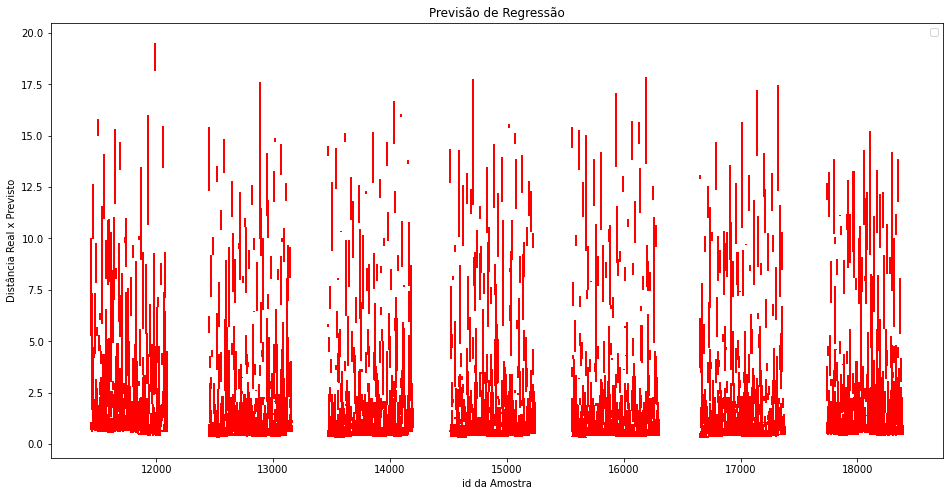

In [25]:
plt.figure(figsize=(16, 8))
plt.vlines(y_test.index, y_test_predicted,y_test.values, color='red', linewidth=2)

plt.title('Previsão de Regressão')
plt.xlabel('id da Amostra')
plt.ylabel('Distância Real x Previsto')
plt.legend()
plt.savefig('predictions_training_test.pdf',format = 'pdf')
plt.show()

# **Faz a previsão da Semana de Testes e Grava resultados para Análise**

In [26]:
y_semana_test = RN.predict(df_semana_teste_normalized)
df_semana_teste.insert(loc=df_semana_teste.shape[1], column='PROBABILIDADE', value=y_semana_test, allow_duplicates= True)
df_semana_teste.shape[1]
df_semana_teste.head()
df_semana_teste.to_csv(path_or_buf = 'Resultados_Semana_Teste.csv', sep=';', decimal = ',') #decimal=',',
